In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
from ising import create_lattice, monte_carlo_metropolis
import matplotlib
from matplotlib import pyplot as plt

In [14]:
def plot_lattice(lattice):
    cmap = matplotlib.colors.ListedColormap(["blue", "red"])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
    ax.imshow(lattice, cmap=cmap, vmin=-1, vmax=1)


def plot_lattice_init_end(output):
    cmap = matplotlib.colors.ListedColormap(["blue", "red"])
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
    axs[0].imshow(output["lattice_init"], cmap=cmap, vmin=-1, vmax=1)
    axs[1].imshow(output["lattice"], cmap=cmap, vmin=-1, vmax=1)


def plot_observable(output, key):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
    ax.plot(output["time"], output[key])

Let us start with large temperature configurations. We know the critical value of the Ising model in 2D.

In [11]:
betac = 0.441

We see that when we vary $\beta$ across the transition temperature, we go from a disordered to an ordered phase.

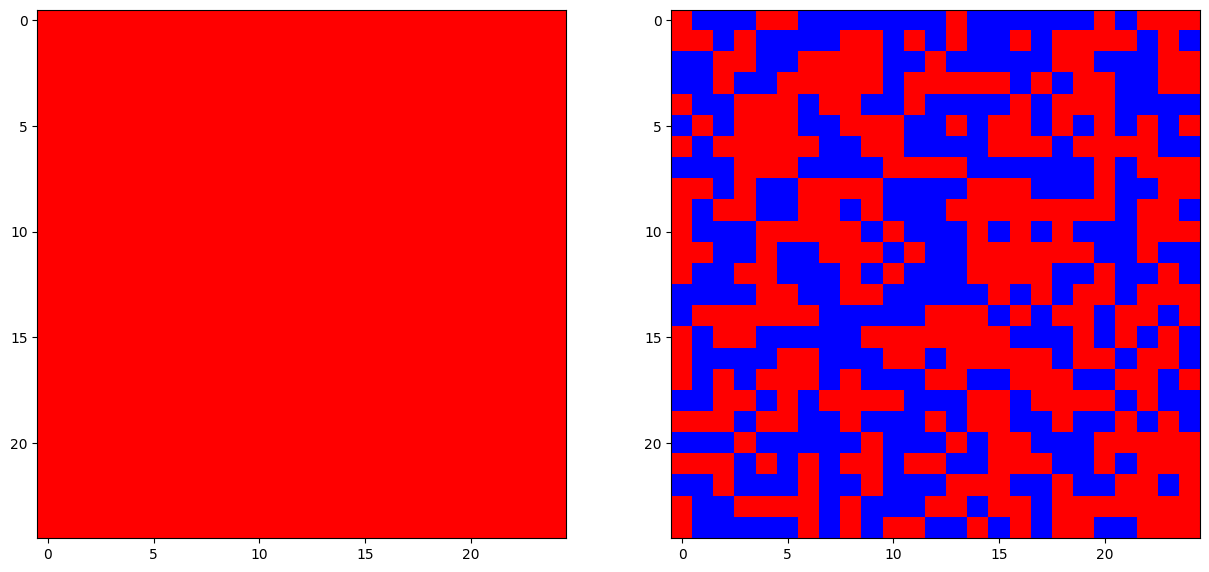

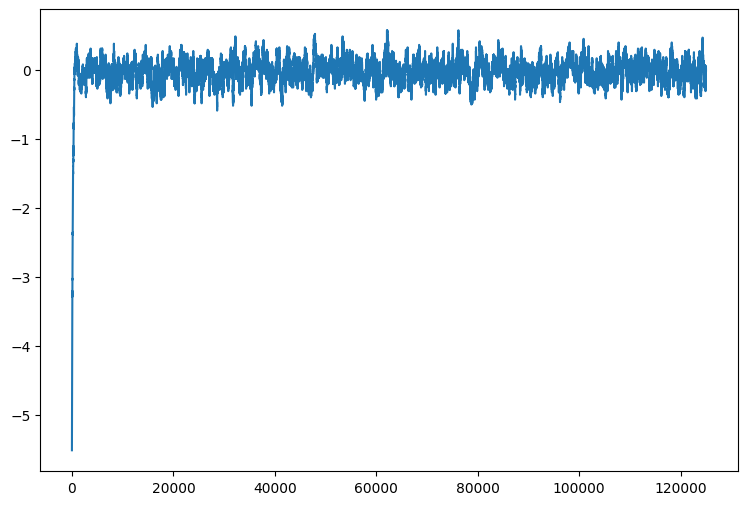

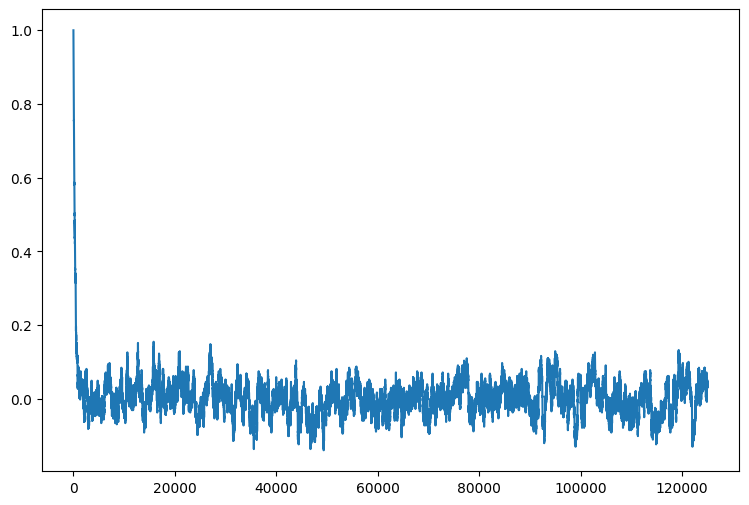

In [20]:
output = monte_carlo_metropolis(
    n=25, beta=0.01 * betac, h=0.0, max_steps=200, initial_state=1,
)
plot_lattice_init_end(output)
plot_observable(output, "benergies")
plot_observable(output, "magnetizations")

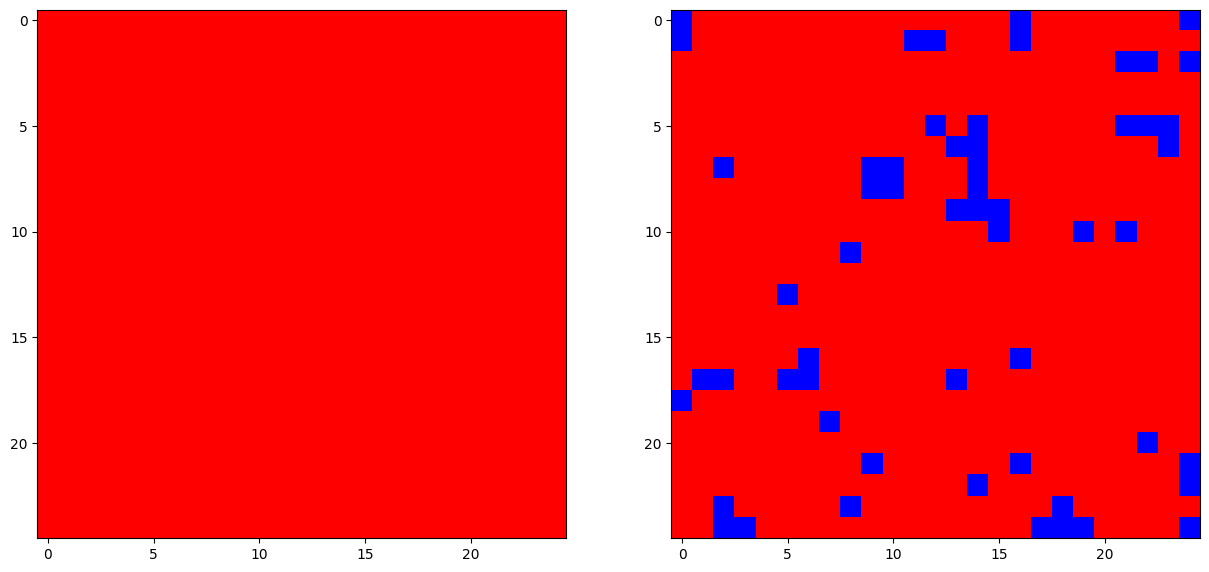

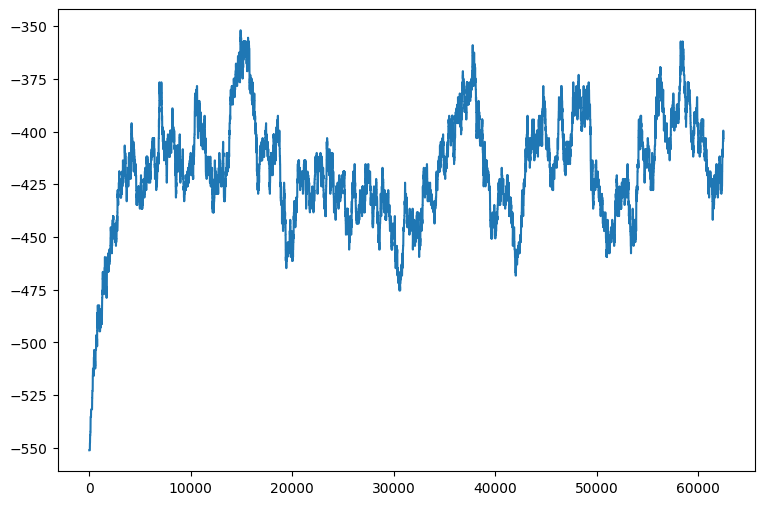

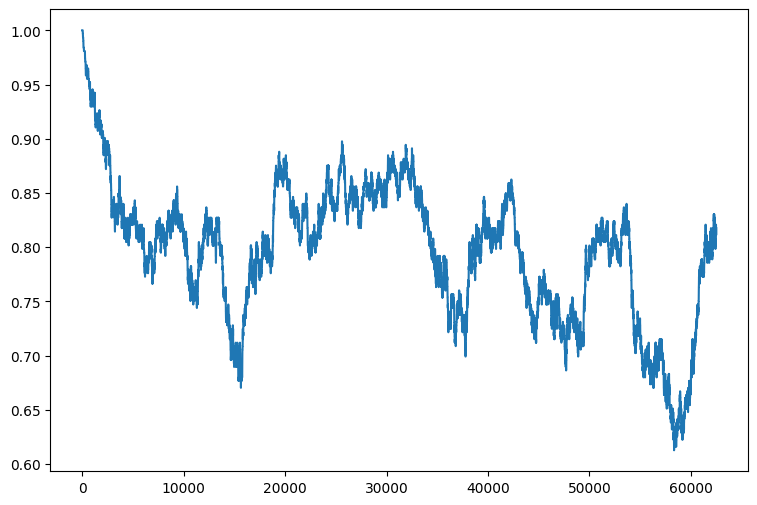

In [21]:
output = monte_carlo_metropolis(
    n=25, beta=1.0 * betac, h=0.0, max_steps=100, initial_state=1
)
plot_lattice_init_end(output)
plot_observable(output, "benergies")
plot_observable(output, "magnetizations")

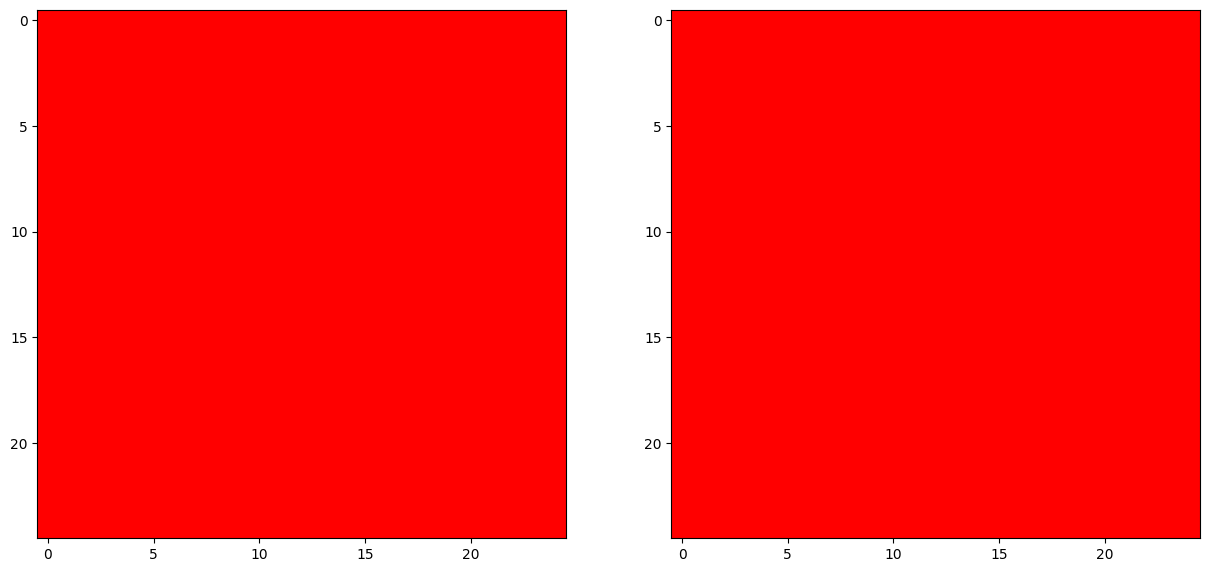

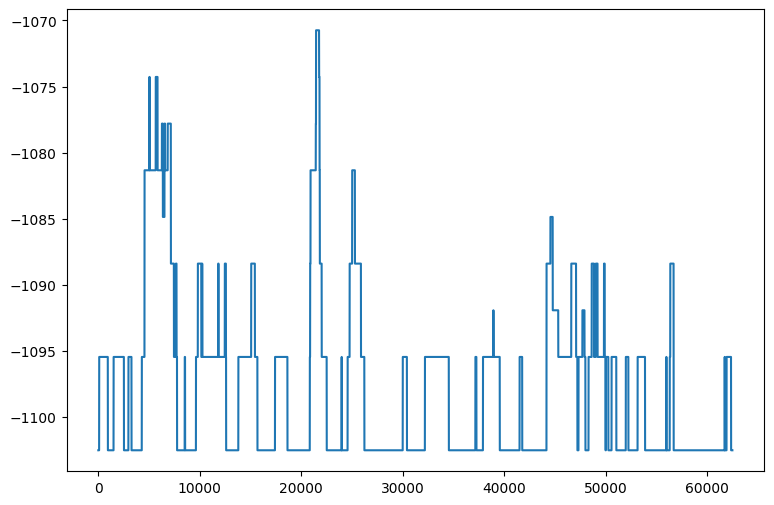

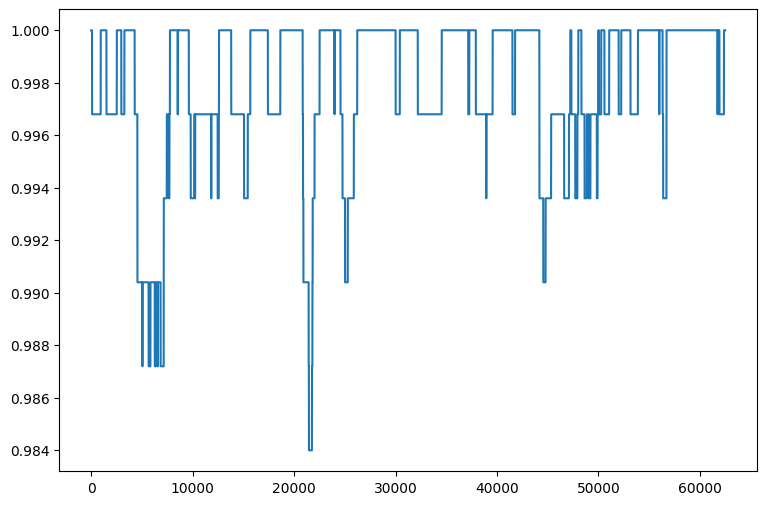

In [22]:
output = monte_carlo_metropolis(
    n=25, beta=2.0 * betac, h=0.0, max_steps=100, initial_state=1
)
plot_lattice_init_end(output)
plot_observable(output, "benergies")
plot_observable(output, "magnetizations")

Now let's see if we can check thoroughly the transition from the observables. We start by varying temperature while starting from a hot state.

In [23]:
betas = betac * np.linspace(0.01, 5.0, num=20)
outputs_series_T = [
    monte_carlo_metropolis(
        n=25, beta=beta, h=0.0, max_steps=200, initial_state=0
    )
    for beta in betas
]

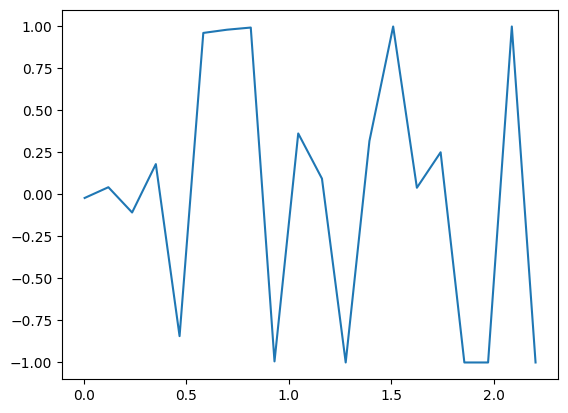

In [24]:
mags = [output["magnetizations"][-1] for output in outputs_series_T]

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(betas, mags)

Interestingly the transition is not obvious from this state. What happens there? We see by plotting the last temperature that from this choice of initial state, the number of iterations is not always enough.

5.0


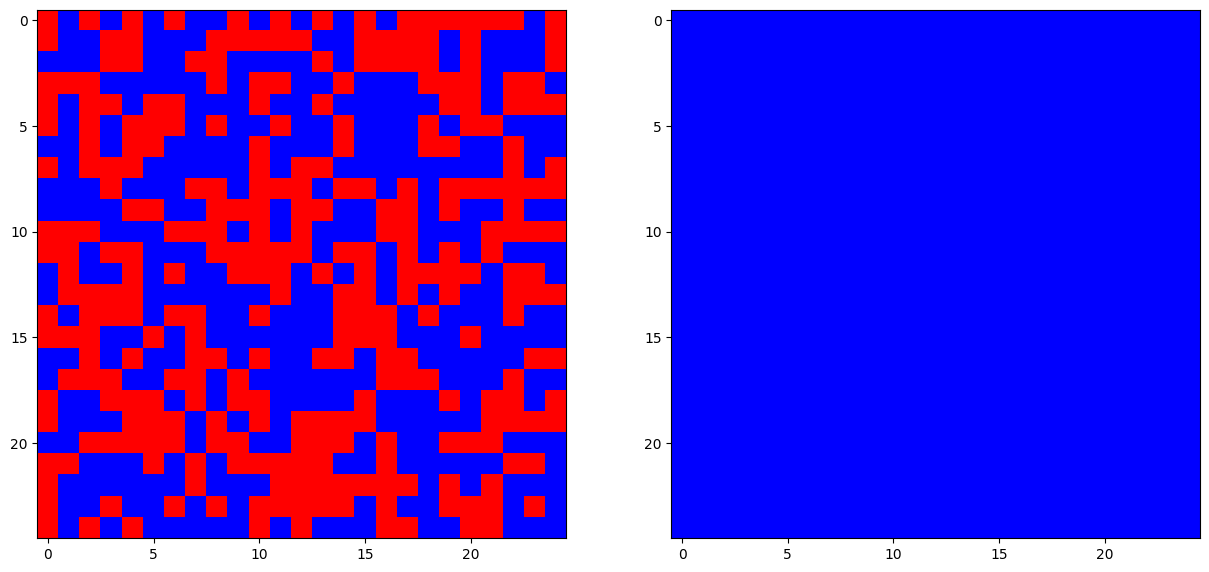

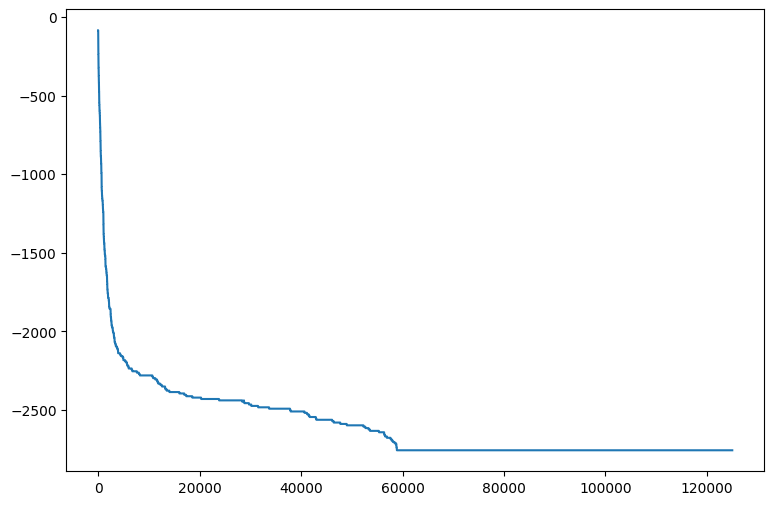

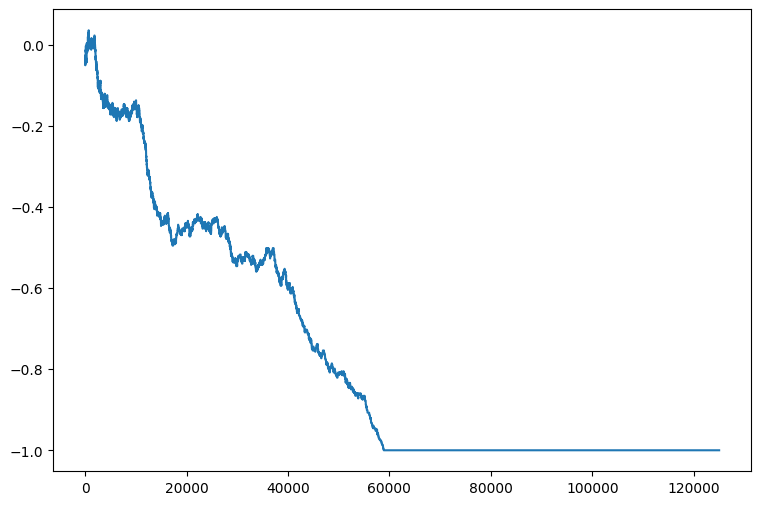

In [25]:
val_choice = -1
print(outputs_series_T[val_choice]["beta"]/betac)
plot_lattice_init_end(outputs_series_T[val_choice])
plot_observable(outputs_series_T[val_choice], "benergies")
plot_observable(outputs_series_T[val_choice], "magnetizations")

0.01


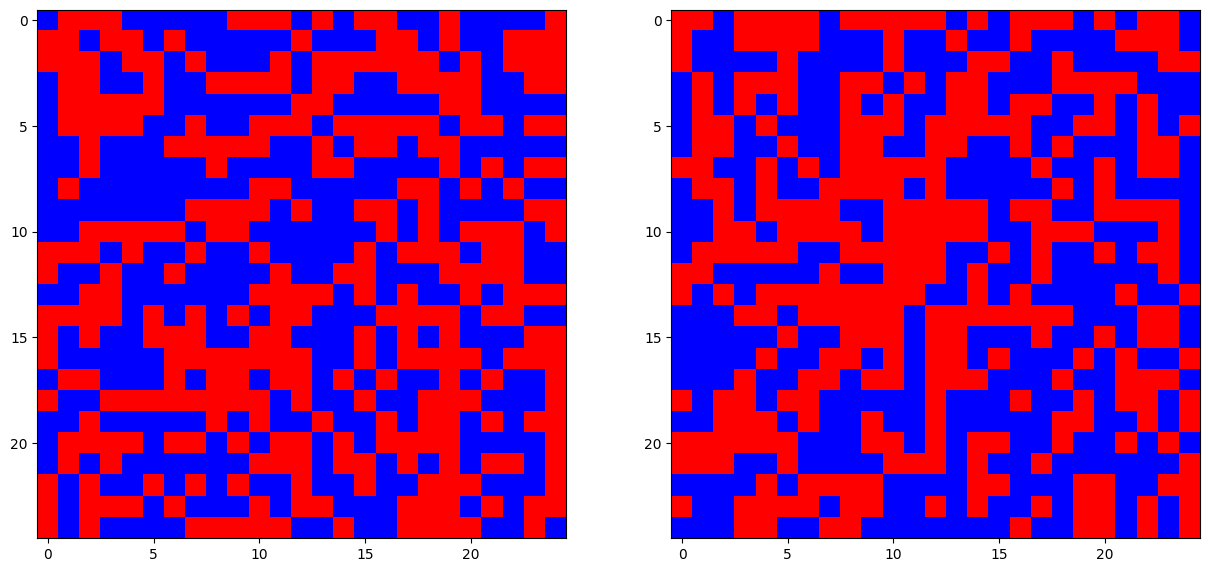

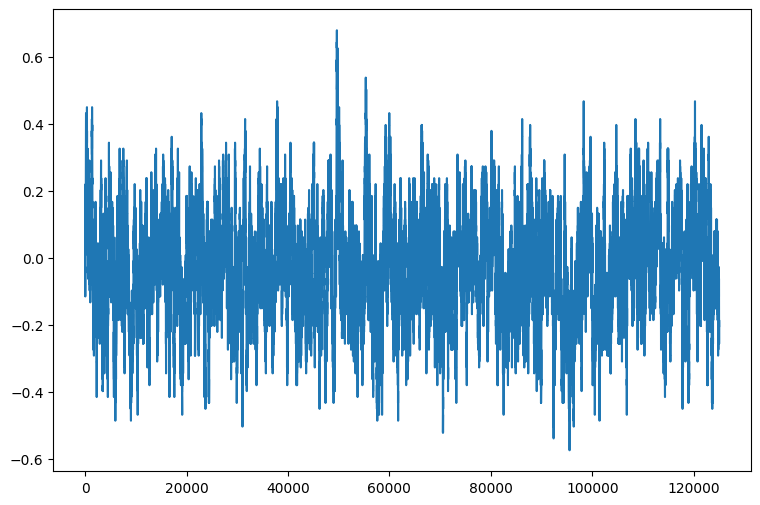

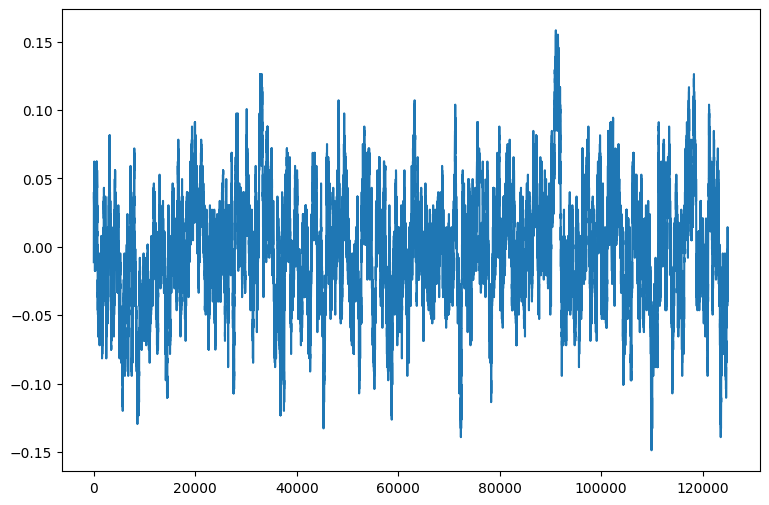

In [26]:
val_choice = 0
print(outputs_series_T[val_choice]["beta"]/betac)
plot_lattice_init_end(outputs_series_T[val_choice])
plot_observable(outputs_series_T[val_choice], "benergies")
plot_observable(outputs_series_T[val_choice], "magnetizations")

We now do the same but starting from a cold state (all spins up).

In [27]:
betas = betac * np.linspace(0.1, 2.0, num=40)
outputs_series_T_from_up = [
    monte_carlo_metropolis(
        n=25, beta=beta, h=0.0, max_steps=200, initial_state=1
    )
    for beta in betas
]

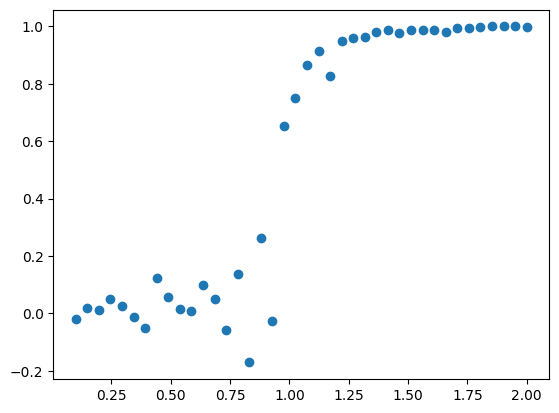

In [28]:
mags_from_up = [output["magnetizations"][-1] for output in outputs_series_T_from_up]

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(betas/betac, mags_from_up)

Here we see the transition at the right temperature, however the disordered phase is quite noisy. Can we do something about this? First let's try to use the correct initial state on each side of the transition.

In [29]:
betas_above = betac * np.linspace(1.05, 2.0, num=20)
outputs_series_T_above = [
    monte_carlo_metropolis(
        n=25, beta=beta, h=0.0, max_steps=200, initial_state=1
    )
    for beta in betas_above
]

betas_below = betac * np.linspace(0.05, stop=0.95, num=20)
outputs_series_T_below = [
    monte_carlo_metropolis(
        n=25, beta=beta, h=0.0, max_steps=200, initial_state=0
    )
    for beta in betas_below
]

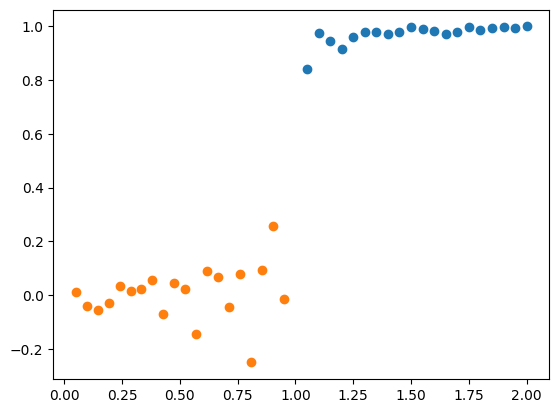

In [30]:
mags_above_above = [output["magnetizations"][-1] for output in outputs_series_T_above] 
mags_above_below = [output["magnetizations"][-1] for output in outputs_series_T_below] 

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(betas_above/betac, mags_above_above)
ax.scatter(betas_below/betac, mags_above_below)

This is still noisy, let us check the effect of system size!

In [31]:
outputs_series_T_larger_n = [
    monte_carlo_metropolis(
        n=50, beta=beta, h=0.0, max_steps=200, initial_state=1
    )
    for beta in betas
]

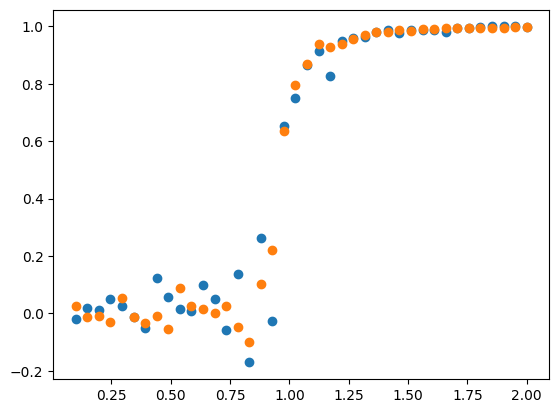

In [32]:
mags_larger_n = [output["magnetizations"][-1] for output in outputs_series_T_larger_n]

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(betas/betac, mags_from_up)
ax.scatter(betas/betac, mags_larger_n)

We see it is marginally better, the noise seems to have reduced. Let us push it more.

In [33]:
outputs_series_T_larger_n_2 = [
    monte_carlo_metropolis(
        n=75, beta=beta, h=0.0, max_steps=200, initial_state=1
    )
    for beta in betas
]

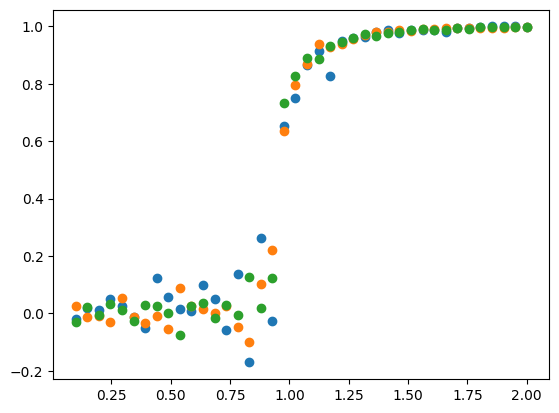

In [34]:
mags_larger_n_2 = [output["magnetizations"][-1] for output in outputs_series_T_larger_n_2]

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(betas/betac, mags_from_up)
ax.scatter(betas/betac, mags_larger_n)
ax.scatter(betas/betac, mags_larger_n_2)

The result gets much better at larger $N$.

0.2


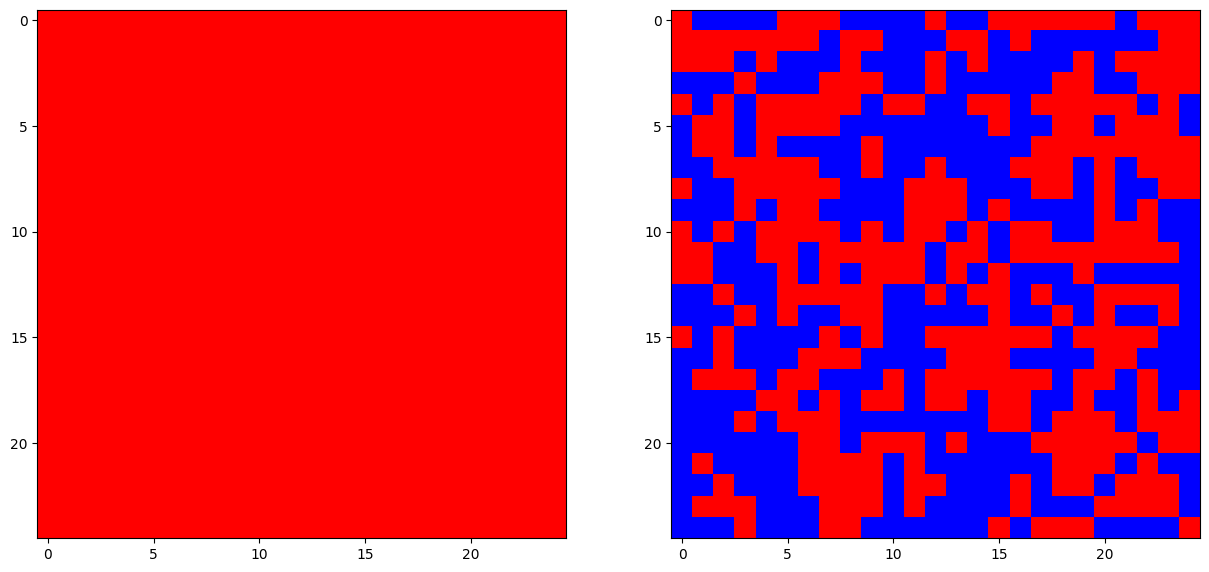

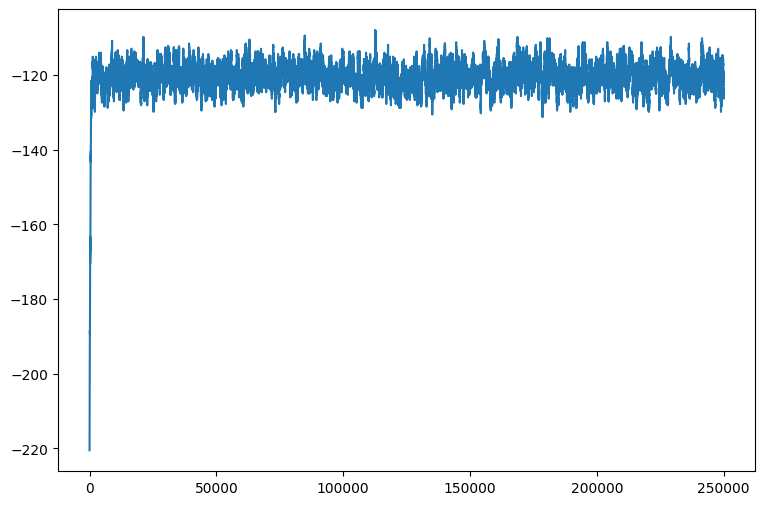

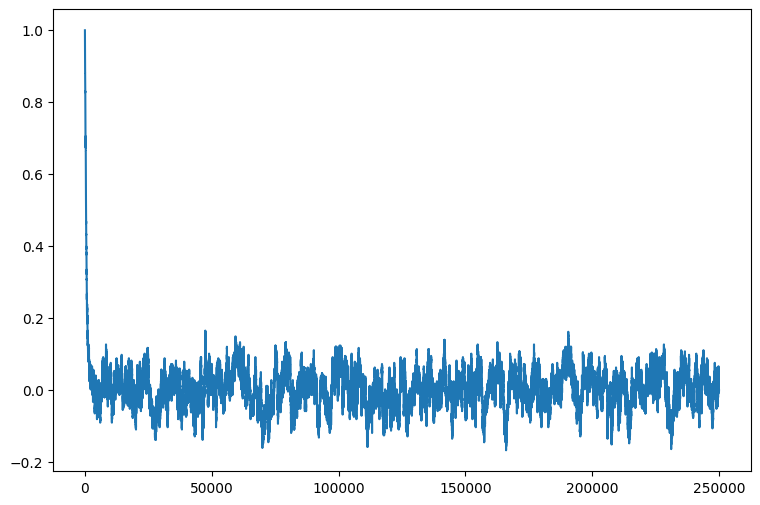

In [8]:
val_choice = 1
print(outputs_series_T_from_up[val_choice]["beta"]/betac)
plot_lattice_init_end(outputs_series_T_from_up[val_choice])
plot_observable(outputs_series_T_from_up[val_choice], "benergies")
plot_observable(outputs_series_T_from_up[val_choice], "magnetizations")